# DS03

## Exercice 1

Le fine-tuning est une technique permettant de spécialiser un modèle pré-entraîné de Machine Learning sur une tâche spécifique.

### C'est quoi un modèle pré-entraîné 
Les modèles pré-entraînés sont des réseaux de neurones détenant des connaissances générales pouvant être appliquées à diverses tâches. Parmi les exemples les plus connus, on peut citer VGG16, ResNet, GPT, GoogleNet, Inception ...

Chacun des ces modèles a des caractéristiques spécifiques. Les différentes couches et les fonctions d’activation utilisées impactent la manière dont le modèle traite l’information, interprète et représente les données.

Le Fine-Tuning consiste à ajuster certains paramètres du modèle tels que les taux d’apprentissage, le poids des neurones et d’autres hyperparamètres pouvant être modifiés pour l’adapter à une tâche spécifique. Il s’agit d’un processus itératif qui vise à améliorer la performance du modèle sur une tâche particulière, sans perdre les connaissances préalables acquises lors de l’entraînement initial.

### VGG16
VGG16 (Visual Geometry Group 16) est un modèle de réseau neuronal convolutif (CNN) largement utilisé dans le domaine de la vision par ordinateur et de la reconnaissance d'images. Il a été développé par le groupe de recherche Visual Geometry Group de l'Université d'Oxford. VGG16 fait partie de la série de modèles VGG, qui se distinguent par leur architecture profonde et uniforme.

L'architecture VGG16 se compose de 16 couches de convolution et de regroupement (pooling), suivies de trois couches entièrement connectées (fully connected). Les couches de convolution sont formées par des filtres de petite taille (3x3) avec une stride de 1, et les couches de pooling effectuent un sous-échantillonnage en prenant le maximum sur des régions de 2x2. Le modèle a une architecture simple et régulière, ce qui le rend facile à comprendre et à utiliser.

**Input -> Conv3–64 -> MaxPool -> Conv3–128 -> MaxPool -> Conv3–256 -> Conv3–256 -> MaxPool -> Conv3–512 -> Conv3–512 -> MaxPool -> Conv3–512 -> Conv3–512 -> MaxPool -> FC-4096 -> FC-4096 -> FC-1000 -> Output**

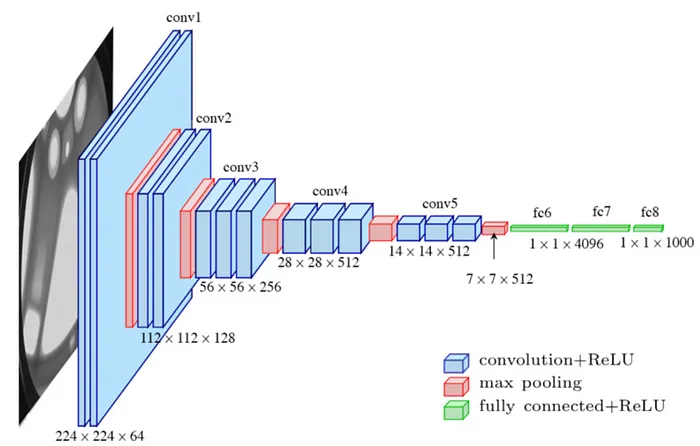

VGG16 a été pré-entraîné sur le jeu de données ImageNet, qui comprend des millions d'images appartenant à des milliers de catégories. En raison de sa performance exceptionnelle sur ImageNet, VGG16 a été largement adopté comme base pour le transfert d'apprentissage dans diverses tâches de vision par ordinateur, telles que la classification d'images, la détection d'objets, et la segmentation sémantique.


### 1- Importation des packages

In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow import keras
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

### 2- ImageDataGenerator
 Utiliser ImageDataGenerator pour 
 * recupérer et transformer les images des dossier cats_dogs/train, cats_dogs/valid et cats_dogs/test
 * appliquer le preprocessing utiliser lors de l'entrainement du modèle VGG16 preprocessing_function=tf.keras.applications.vgg16.preprocess_input
 * redimentionner les images en (224,224) compatible avec VGG16 input
 
**Remarque**: ImageDataGenerator renvoie un objet iterator sur le dossier passer en paramétre

**lien**: https://medium.com/featurepreneur/image-data-augmentation-using-keras-imagedatagenerator-1cee60255ea8

In [3]:
#Training data
train=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory="./cats_dogs/train", target_size=(224,224),classes=["cat","dog"],batch_size=10)

# Vérifier la structure de l'objet train

Found 1000 images belonging to 2 classes.


In [13]:
# Validation data
valid = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
.flow_from_directory(directory="./cats_dogs/valid", target_size=(224,224), classes=["cat","dog"], batch_size=10)


Found 400 images belonging to 2 classes.


In [17]:
# Test data
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

test_generator = test_datagen.flow_from_directory(
    directory="./cats_dogs/test",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 200 images belonging to 2 classes.


In [18]:
#récuperation d'un batch de données
x_train, y_train=next(train)

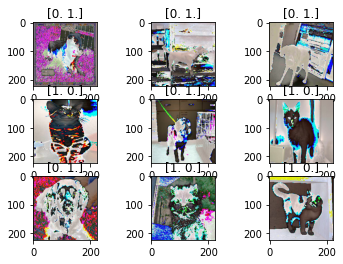

In [20]:
# Affichage de 9 images de x_train et leurs labels

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].astype("uint8")) 
    plt.title(y_train[i]) 

plt.show()



## 3- CNN

1. Créer et compiler le modèle CNN suivant
 Input -> Conv3–32 -> MaxPool -> Conv3–64 -> MaxPool -> Conv3–128 -> FC-100 -> FC-2 -> Output

In [24]:
# Création et compilation

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

2024-03-19 10:56:06.781264: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 138444800 exceeds 10% of free system memory.
2024-03-19 10:56:06.895901: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 138444800 exceeds 10% of free system memory.
2024-03-19 10:56:06.921547: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 138444800 exceeds 10% of free system memory.


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 346112)           

2. Entrainer le modèle

In [26]:
# Entrainement du modèle
model.fit(train, epochs=5, validation_data=valid, batch_size=32 
)


Epoch 1/5
100/100 [==============================] - 70s 702ms/step - loss: 0.6726 - accuracy: 0.6130 - val_loss: 0.6894 - val_accuracy: 0.5250
Epoch 2/5
100/100 [==============================] - 71s 708ms/step - loss: 0.6556 - accuracy: 0.6380 - val_loss: 0.6905 - val_accuracy: 0.5200
Epoch 3/5
100/100 [==============================] - 75s 752ms/step - loss: 0.5582 - accuracy: 0.7280 - val_loss: 0.9036 - val_accuracy: 0.5450
Epoch 4/5
100/100 [==============================] - 73s 727ms/step - loss: 0.3905 - accuracy: 0.8340 - val_loss: 1.0326 - val_accuracy: 0.5325
Epoch 5/5
100/100 [==============================] - 70s 698ms/step - loss: 0.3042 - accuracy: 0.8780 - val_loss: 1.4446 - val_accuracy: 0.5275


3. Afficher la matrice de confusion et le Rapport classification 

In [27]:
from sklearn.metrics import confusion_matrix, classification_report


y_pred = model.predict(test_generator)
y_pred_classe = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

print(f"Matrice de confusion :{confusion_matrix(y_true, y_pred_classe)}")

print(f"Rapport de classification :{classification_report(y_true, y_pred_classe)}")


Matrice de confusion :[[58 42]
 [52 48]]
Rapport de classification :              precision    recall  f1-score   support

           0       0.53      0.58      0.55       100
           1       0.53      0.48      0.51       100

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200



## 4- VGG16 et Fine-tuning


In [ ]:
vggModel=tf.keras.applications.vgg16.VGG16()
vggModel.summary()

In [ ]:
# Desactiver la modification des poids de toute les couche de ce model




In [ ]:
# Remplacer la cauche de sortie ce modèle par une couche de deux neurone avec la fonction d'activation softmax




In [ ]:
# Entrainer ce nouveau modèle avec les donnée cats_dogs





In [ ]:
# Evaluation et Matrice de confusion et rapport de classification





In [ ]:
# Comparaison des performances des deux modèles





## Exercice 2

Dans cet exercice nous allons créer un arbre de décision à partir du dataset titanic.csv

In [83]:
# Importation des packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [98]:
# Chargement des données et affichage des statistiques de ce données (mean, std, valeurs null ...)
df=pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [85]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [86]:
# Remplacer les valeurs NaN par la moyenne de la colonne
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Exclude non-numeric columns from the DataFrame
numeric_df = df.drop(columns=non_numeric_columns)

# Fill missing values with the mean of each numeric column
numeric_df.fillna(numeric_df.mean(), inplace=True)

# Concatenate the filled numeric DataFrame with non-numeric columns
filled_df = pd.concat([numeric_df, df[non_numeric_columns]], axis=1)


In [87]:
print(df.describe())

         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   14.45420  
75%                   0.000000   31.13750  
max              

In [88]:
df.rename(columns = {'Siblings/Spouses Aboard':'SibSp'}, inplace = True)

In [89]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [90]:
# suppression de toutes les colones sauf: Survived, Pclass, Sex, Age, SibSp
colonnes_a_garder = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp']
df = df[colonnes_a_garder]




In [91]:
sex_mapping = {'male': 0, 'female': 1}
# Appliquer le mapping à la colonne "Sex"
df['Sex'] = df['Sex'].map(sex_mapping)

In [92]:
df.head()

,Survived,Pclass,Sex,Age,SibSp
0,0,3,0,22.0,1
1,1,1,1,38.0,1
2,1,3,1,26.0,0
3,1,1,1,35.0,1
4,0,3,0,35.0,0


In [93]:
# Train test split

X = df[['Pclass', 'Sex', 'Age', 'SibSp']]
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)




In [94]:
# Créer un objet d'arbre de décision avec une profondeur maximale de 3 et le critère Gini
dt1 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Entraîner l'arbre de décision sur l'ensemble d'entraînement
dt1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [95]:
# Création d'un arbre de décision -dt2- d'une profendeur max de 3 en utilisant l'Entropie
dt2 = DecisionTreeClassifier(max_depth=3, criterion='entropy')

# Entraîner le modèle sur les données d'entraînement
dt2.fit(x_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [96]:
#Comparer les performance de ces deux models
# Prédire les étiquettes sur les données de test pour dt1
y_pred_dt1 = dt1.predict(x_test)

# Prédire les étiquettes sur les données de test pour dt2
y_pred_dt2 = dt2.predict(x_test)

# Calculer l'exactitude (accuracy) pour chaque modèle
accuracy_dt1 = accuracy_score(y_test, y_pred_dt1)
accuracy_dt2 = accuracy_score(y_test, y_pred_dt2)

# Afficher les performances
print("Exactitude (Accuracy) pour dt1 (Gini) :", accuracy_dt1)
print("Exactitude (Accuracy) pour dt2 (Entropie) :", accuracy_dt2)



Exactitude (Accuracy) pour dt1 (Gini) : 0.7972972972972973
Exactitude (Accuracy) pour dt2 (Entropie) : 0.7972972972972973


In [97]:
#Sauvgarder le meilleur modèle sous le nom titanic_dt
import pickle
# Select the best model based on accuracy
if accuracy_dt1 > accuracy_dt2:
    best_model = dt1
else:
    best_model = dt2

# Save the best model
with open('titanic_dt.pkl', 'wb') as f:
    pickle.dump(best_model, f)

## Exercice 3
Ecrire un application flask qui permet de charger ce modèle et affiche un formulaire pour saisir les donnée d'un passager et affiche sa prediction de survie.

